# Reducing the dimensions of image data

## Principal component analysis(PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.DataFrame(
    {
        'x1': np.random.normal(loc=10.0, scale=5.0, size=8),
        'noise': np.random.normal(loc=0.0, scale=1.0, size=8),
    }
)

df['x2'] = 3 * df['x1'] + df['noise'] 

df[['x1', 'x2']]

x1         x2
0  10.726601  30.860859
1   3.663418  10.249158
2  14.673039  45.150732
3   2.247371   6.256914
4   6.387537  17.232989
5   6.630759  17.708560
6   7.492963  21.918856
7  13.434857  39.937677

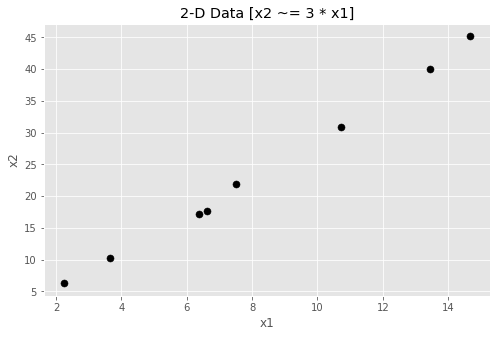

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df.plot(
    title='2-D Data [x2 ~= 3 * x1]',
    kind='scatter', x='x1', y='x2', ax=ax, color='k', s=50
)

fig.show()


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler(with_std=False)

x = scaler.fit_transform(df[['x1', 'x2']])
# x = df[['x1', 'x2']]

pca = PCA(n_components=1)

pca.fit_transform(x)

array([[  7.63717849],
       [-14.14664397],
       [ 22.44990447],
       [-18.38054565],
       [ -6.66477348],
       [ -6.13768884],
       [ -1.86497825],
       [ 17.10754722]])

In [6]:
pca.explained_variance_

array([211.21906366])

In [7]:
pca.components_

array([[0.30489032, 0.95238747]])

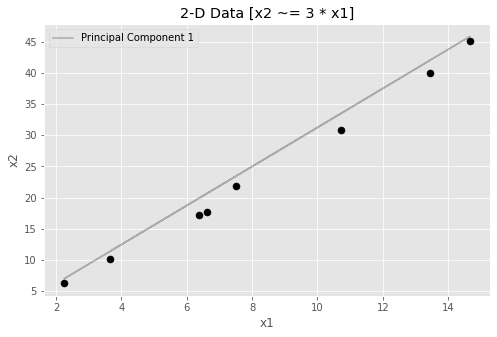

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df.plot(
    title='2-D Data [x2 ~= 3 * x1]',
    kind='scatter', x='x1', y='x2', ax=ax, color='k', s=50
)

c1_slope = pca.components_[0][1] / pca.components_[0][0]
c1 = np.array([
    [x1, x1 * c1_slope]
    for x1 in df['x1'].values
])
ax.plot(c1[:,0], c1[:,1], '-k', alpha=0.25, label='Principal Component 1')

ax.legend()

fig.show()

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
digits['data'].min(), digits['data'].max()

def display_img(img, target, ax):
    img = img.reshape((8, 8))
    
    ax.imshow(img, cmap='gray',)
    ax.set_title(f'Digit: {str(target)}')
    ax.grid(False)

In [10]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

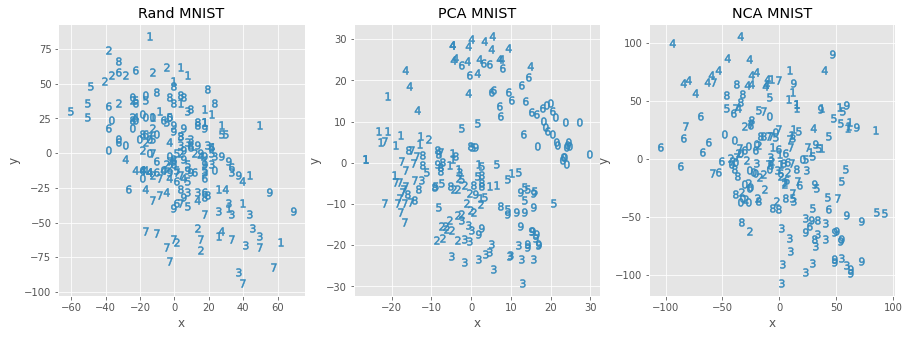

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

methods = {
 'Rand': SparseRandomProjection(n_components=2),
 'PCA': PCA(n_components=2),
 'NCA': NeighborhoodComponentsAnalysis(n_components=2, init='random'),
}

for i, (method_name, method_obj) in enumerate(methods.items()):
 
    scaler = StandardScaler(with_std=False)
    x_train_scaled = scaler.fit_transform(x_train)
 
    method_obj.fit(x_train_scaled, y_train)
    x_train_2d = method_obj.transform(x_train_scaled)
 
    for target in set(y_train):
        pd.DataFrame(
            x_train_2d[
                y_train == target
            ], columns=['y', 'x']
        ).sample(n=20).plot(
            kind='scatter', x='x', y='y', 
            marker=f'${target}$', s=64, ax=axs[i]
        )
        axs[i].set_title(f'{method_name} MNIST')

fig.show()